In [1]:
#Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve
from matplotlib import pyplot as plt

In [2]:
# Read CSV Data
df = pd.read_csv('resto-review-with-nan.csv', encoding= 'unicode_escape') #Produce[s] a string that is suitable as Unicode literal in Python source code
df.head()

,ulasan,rasa,sambal,keramaian,kenyamanan,pelayanan,rating,sentimen
0,100/100 deh untuk resto ini! udah harganya mur...,BAGUS,NETRAL,NETRAL,BAGUS,BAGUS,5.0,1
1,AC-nya rusak,BURUK,NETRAL,NETRAL,BURUK,BURUK,2.0,0
2,Affordable Price,NETRAL,NETRAL,NETRAL,BAGUS,NETRAL,5.0,1
3,Akhirnya kemauan selama ini sudah direalisasik...,BAGUS,NETRAL,NETRAL,BAGUS,BAGUS,5.0,1
4,Always love to come back to here. Kesini bisa ...,BAGUS,NETRAL,NETRAL,NETRAL,BAGUS,4.0,1


In [3]:
# Drop unused column
inputs = df.drop(['sentimen','ulasan','rating'], axis='columns')
target = df['sentimen']

In [4]:
inputs.head(8)

,rasa,sambal,keramaian,kenyamanan,pelayanan
0,BAGUS,NETRAL,NETRAL,BAGUS,BAGUS
1,BURUK,NETRAL,NETRAL,BURUK,BURUK
2,NETRAL,NETRAL,NETRAL,BAGUS,NETRAL
3,BAGUS,NETRAL,NETRAL,BAGUS,BAGUS
4,BAGUS,NETRAL,NETRAL,NETRAL,BAGUS
5,BURUK,NETRAL,NETRAL,BURUK,BURUK
6,BURUK,NETRAL,NaN,BURUK,BURUK
7,NETRAL,NETRAL,NETRAL,BAGUS,BAGUS


In [5]:
#Fill NAN Value with Netral
inputs.fillna('NETRAL', inplace=True)

In [6]:
inputs.head(8)

,rasa,sambal,keramaian,kenyamanan,pelayanan
0,BAGUS,NETRAL,NETRAL,BAGUS,BAGUS
1,BURUK,NETRAL,NETRAL,BURUK,BURUK
2,NETRAL,NETRAL,NETRAL,BAGUS,NETRAL
3,BAGUS,NETRAL,NETRAL,BAGUS,BAGUS
4,BAGUS,NETRAL,NETRAL,NETRAL,BAGUS
5,BURUK,NETRAL,NETRAL,BURUK,BURUK
6,BURUK,NETRAL,NETRAL,BURUK,BURUK
7,NETRAL,NETRAL,NETRAL,BAGUS,BAGUS


In [7]:
# Create label for each column
le_rasa = LabelEncoder()
le_sambal = LabelEncoder()
le_keramaian = LabelEncoder()
le_kenyamanan = LabelEncoder()
le_pelayanan = LabelEncoder()

In [8]:
# Create new column based on label, fit_transform the dataset, and assigned to the new created column
inputs['rasa_n'] = le_rasa.fit_transform(inputs['rasa'])
inputs['sambal_n'] = le_sambal.fit_transform(inputs['sambal'])
inputs['keramaian_n'] = le_keramaian.fit_transform(inputs['keramaian'])
inputs['kenyamanan_n'] = le_kenyamanan.fit_transform(inputs['kenyamanan'])
inputs['pelayanan_n'] = le_pelayanan.fit_transform(inputs['pelayanan'])

In [9]:
inputs.head(8)

,rasa,sambal,keramaian,kenyamanan,pelayanan,rasa_n,sambal_n,keramaian_n,kenyamanan_n,pelayanan_n
0,BAGUS,NETRAL,NETRAL,BAGUS,BAGUS,0,2,2,0,0
1,BURUK,NETRAL,NETRAL,BURUK,BURUK,1,2,2,1,1
2,NETRAL,NETRAL,NETRAL,BAGUS,NETRAL,2,2,2,0,2
3,BAGUS,NETRAL,NETRAL,BAGUS,BAGUS,0,2,2,0,0
4,BAGUS,NETRAL,NETRAL,NETRAL,BAGUS,0,2,2,2,0
5,BURUK,NETRAL,NETRAL,BURUK,BURUK,1,2,2,1,1
6,BURUK,NETRAL,NETRAL,BURUK,BURUK,1,2,2,1,1
7,NETRAL,NETRAL,NETRAL,BAGUS,BAGUS,2,2,2,0,0


In [10]:
# Drop unused column
inputs_n = inputs.drop(['rasa','sambal','keramaian','kenyamanan','pelayanan'], axis='columns')
inputs_n.head(8)

,rasa_n,sambal_n,keramaian_n,kenyamanan_n,pelayanan_n
0,0,2,2,0,0
1,1,2,2,1,1
2,2,2,2,0,2
3,0,2,2,0,0
4,0,2,2,2,0
5,1,2,2,1,1
6,1,2,2,1,1
7,2,2,2,0,0


In [11]:
#Splitting the dataset to train and test data
X = inputs_n
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM (Support Vector Machines)

In [12]:
# Import svm model
from sklearn import svm

In [13]:
#Create a svm classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

In [14]:
#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

In [15]:
print('Confussion Matrix \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Accuracy Score on the train data: ', accuracy_score(y_train, clf_svm.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_test, y_pred))
print('\n')
print('Precision Score on the train data: ', precision_score(y_train, clf_svm.predict(X_train)))
print('Precision Score on the test data: ', precision_score(y_test, y_pred))
print('\n')
print('Recall Score on the train data: ', recall_score(y_train, clf_svm.predict(X_train)))
print('Recall Score on the test data: ', recall_score(y_test, y_pred))
print('\n')
print('F1 Score on the train data: ', f1_score(y_train, clf_svm.predict(X_train)))
print('F1 Score on the test data: ', f1_score(y_test, y_pred))

Confussion Matrix 
 [[129  27]
 [ 26 118]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       156
           1       0.81      0.82      0.82       144

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

Accuracy Score on the train data:  0.8585714285714285
Accuracy Score on the test data:  0.8233333333333334


Precision Score on the train data:  0.84
Precision Score on the test data:  0.8137931034482758


Recall Score on the train data:  0.8898305084745762
Recall Score on the test data:  0.8194444444444444


F1 Score on the train data:  0.8641975308641976
F1 Score on the test data:  0.8166089965397922


# Naive Bayes

In [16]:
# Import naive bayes model
from sklearn.naive_bayes import GaussianNB 

In [17]:
clf_gnb = GaussianNB() 
clf_gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = clf_gnb.predict(X_test) 

In [18]:
print('Confussion Matrix \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Accuracy Score on the train data: ', accuracy_score(y_train, clf_gnb.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_test, y_pred))
print('\n')
print('Precision Score on the train data: ', precision_score(y_train, clf_gnb.predict(X_train)))
print('Precision Score on the test data: ', precision_score(y_test, y_pred))
print('\n')
print('Recall Score on the train data: ', recall_score(y_train, clf_gnb.predict(X_train)))
print('Recall Score on the test data: ', recall_score(y_test, y_pred))
print('\n')
print('F1 Score on the train data: ', f1_score(y_train, clf_gnb.predict(X_train)))
print('F1 Score on the test data: ', f1_score(y_test, y_pred))

Confussion Matrix 
 [[129  27]
 [  5 139]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       156
           1       0.84      0.97      0.90       144

    accuracy                           0.89       300
   macro avg       0.90      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300

Accuracy Score on the train data:  0.9014285714285715
Accuracy Score on the test data:  0.8933333333333333


Precision Score on the train data:  0.8518518518518519
Precision Score on the test data:  0.8373493975903614


Recall Score on the train data:  0.9745762711864406
Recall Score on the test data:  0.9652777777777778


F1 Score on the train data:  0.9090909090909092
F1 Score on the test data:  0.896774193548387


# Decision Tree

In [19]:
# Import decision tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [20]:
#Building Decision Tree Model
clf_tree = DecisionTreeClassifier(criterion = 'entropy') #set the 'criterion' to 'entropy', which sets the measure for splitting the attribute to information gain
clf_tree = clf_tree.fit(X_train,y_train)

# making predictions on the testing set 
y_pred = clf_tree.predict(X_test)

In [21]:
print('Confussion Matrix \n', confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print('Accuracy Score on the train data: ', accuracy_score(y_train, clf_tree.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_test, y_pred))
print('\n')
print('Precision Score on the train data: ', precision_score(y_train, clf_tree.predict(X_train)))
print('Precision Score on the test data: ', precision_score(y_test, y_pred))
print('\n')
print('Recall Score on the train data: ', recall_score(y_train, clf_tree.predict(X_train)))
print('Recall Score on the test data: ', recall_score(y_test, y_pred))
print('\n')
print('F1 Score on the train data: ', f1_score(y_train, clf_tree.predict(X_train)))
print('F1 Score on the test data: ', f1_score(y_test, y_pred))

Confussion Matrix 
 [[149   7]
 [  0 144]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       156
           1       0.95      1.00      0.98       144

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Accuracy Score on the train data:  0.9885714285714285
Accuracy Score on the test data:  0.9766666666666667


Precision Score on the train data:  0.9779005524861878
Precision Score on the test data:  0.9536423841059603


Recall Score on the train data:  1.0
Recall Score on the test data:  1.0


F1 Score on the train data:  0.988826815642458
F1 Score on the test data:  0.976271186440678


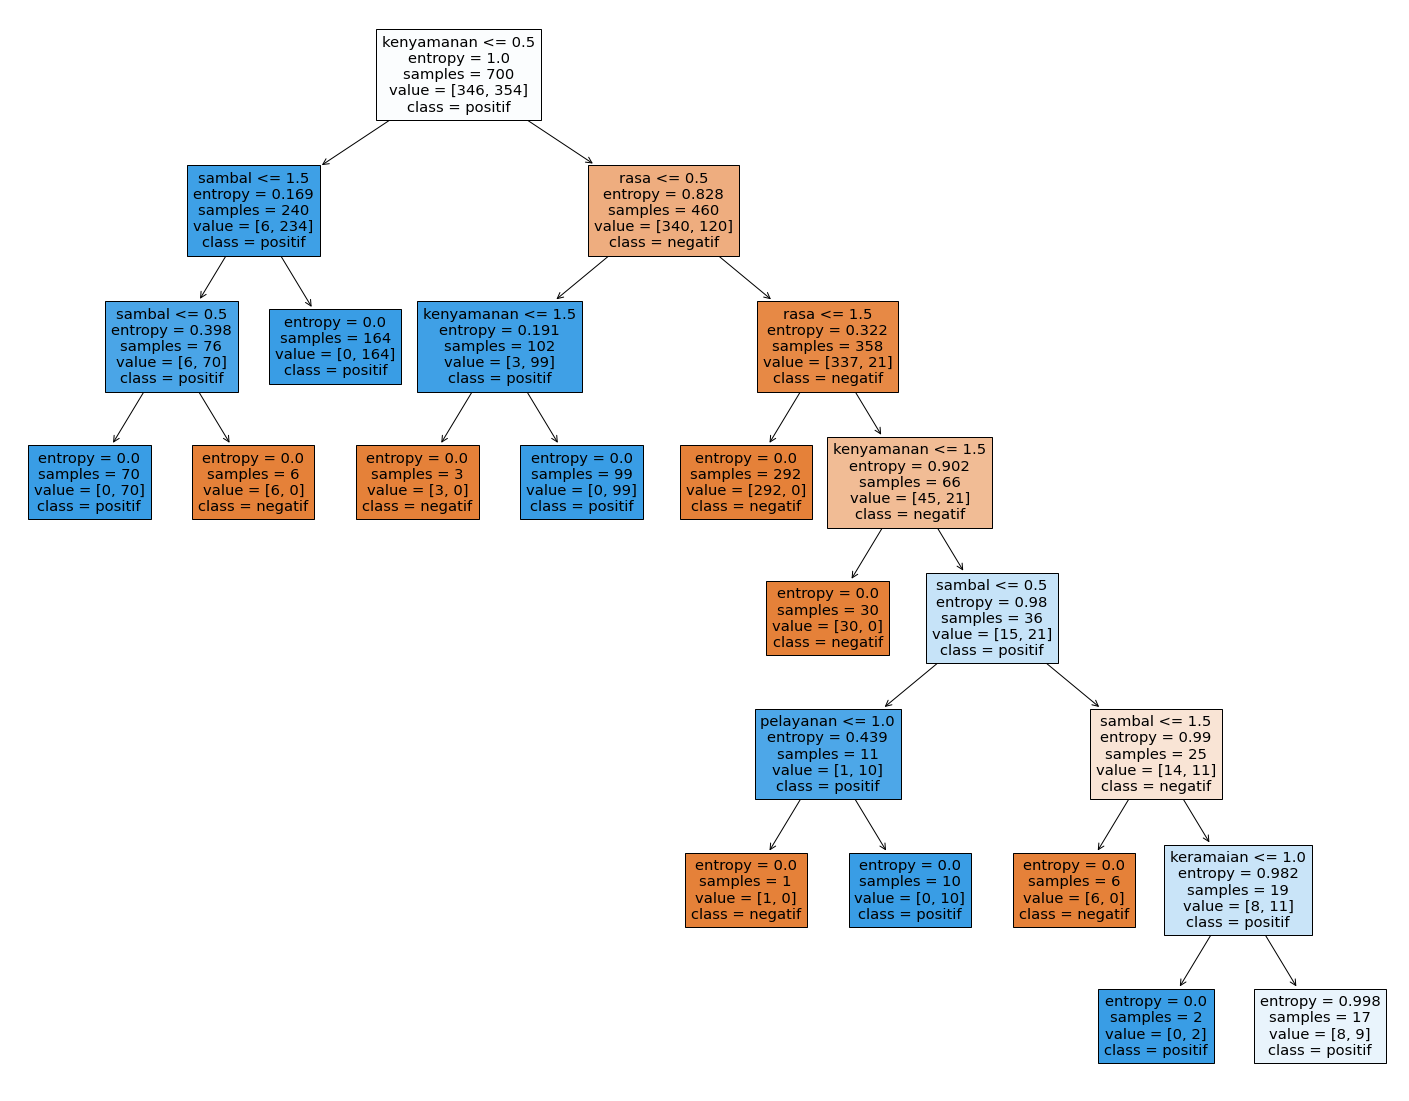

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_tree, 
                   feature_names=['kenyamanan','keramaian','pelayanan','rasa','sambal'],  
                   class_names=['negatif','positif'],
                   filled=True)